In [2]:
%load_ext watermark
%watermark

2019-04-04T18:25:35-06:00

CPython 3.7.3rc1
IPython 7.3.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [1]:
import pandas as pd
import numpy as np

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16

In [4]:
vehiculos = pd.read_csv("D:/datasets/Curso_Mauel_Garrido/vehiculos/vehiculos_procesado.csv", 
                        usecols = ["consumo", "co2", "cilindros", "desplazamiento"])
litros_por_galon = 3.78541
vehiculos["consumo_litros_milla"] = litros_por_galon / vehiculos.consumo

In [5]:
vehiculos.shape

(35539, 5)

In [6]:
vehiculos.head()

,desplazamiento,cilindros,consumo,co2,consumo_litros_milla
0,2.5,4.0,17,522.764706,0.222671
1,4.2,6.0,13,683.615385,0.291185
2,2.5,4.0,16,555.437500,0.236588
3,4.2,6.0,13,683.615385,0.291185
4,3.8,6.0,16,555.437500,0.236588


El modelo de regresión lineal mediante OLS (ordinary least squares) tiene la forma:

$$ \hat{y} = \alpha + \beta_{1}*x_{1} + \beta_{2}*x_{2} + ... + \beta_{n}*x_{n} + \varepsilon$$

Donde $\hat{y}$ es la predicción que queremos hacer,

$\alpha$ es el término independiente,

$\beta_{n}$ es un vector de coeficientes
y $x_{n}$ son los valores de las variables del dataset.

El objetivo es obtener $\alpha$ y $\beta_{n}$  tales que error cuadrático (residuo) , definido como:

$$RSS = \varepsilon² = \sum\limits_{i=1}^n(y_{i} - (\alpha - \beta_{i}x_{i}))^2$$

sea el mínimo.

Para ello tenemos que resolver las siguientes equaciones

$$\hat{\alpha} = \bar{y} - \hat{\beta}*\bar{x}$$
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

Para obtener los coeficientes del modelo dedicamos una fracción del dataset a entrenar y otra a evaluar los resultados (para evitar sobreajustes o sobregeneralización)

In [7]:
pct_entrenamiento = 0.8

In [11]:
vehiculos_training = vehiculos.sample(frac = pct_entrenamiento)
vehiculos_test = vehiculos[~vehiculos.index.isin(vehiculos_training.index)]
print(vehiculos_training.shape)
print(vehiculos_test.shape)

(28431, 5)
(7108, 5)


In [14]:
variables_independientes = ['desplazamiento', 'cilindros', 'consumo_litros_milla']
variable_dependiente = 'co2'
X = vehiculos_training[variables_independientes].as_matrix()
y = vehiculos_training[variable_dependiente].as_matrix()
X_T = X.T

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [15]:
X

array([[5.2       , 8.        , 0.31545083],
       [2.        , 4.        , 0.14559269],
       [3.        , 6.        , 0.16458304],
       ...,
       [2.5       , 4.        , 0.15772542],
       [1.8       , 4.        , 0.14020037],
       [2.        , 4.        , 0.16458304]])

In [16]:
X.shape

(28431, 3)

In [17]:
y

array([740.58333333, 341.80769231, 384.        , ..., 370.29166667,
       326.        , 386.39130435])

In [18]:
betas = np.linalg.inv(X_T @ X) @ X_T @ y
betas

array([ 3.67859642e+00, -5.14430721e-01,  2.30509643e+03])

In [19]:
y.mean()

470.912053753045

In [20]:
alfa = y.mean() - np.dot(betas, vehiculos_training[variables_independientes].mean().as_matrix())
alfa

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.36788778112128284

In [21]:
def predecir(r):
    return alfa + np.dot(betas, r.values)

In [23]:
vehiculos_training["co2_pred"] = vehiculos_training[variables_independientes].apply(predecir, axis = 1)
vehiculos_test["co2_pred"] = vehiculos_test[variables_independientes].apply(predecir, axis = 1)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
vehiculos_training[["co2", "co2_pred"]].head()

,co2,co2_pred
8732,740.583333,742.525733
12936,341.807692,341.272553
2237,384.000000,387.696879
21884,740.583333,743.410887
5919,670.000000,685.120095


In [27]:
model_formula = "y ~ {alfa:.3f} + {beta_1:.2f} * desplazamiento + {beta_2:.2f} * cilindros + {beta_3:.2f} * consumo_lito_milla".format(
    alfa = alfa, beta_1 = betas[0], beta_2 = betas[1], beta_3 = betas[2])
model_formula

'y ~ 0.368 + 3.68 * desplazamiento + -0.51 * cilindros + 2305.10 * consumo_lito_milla'

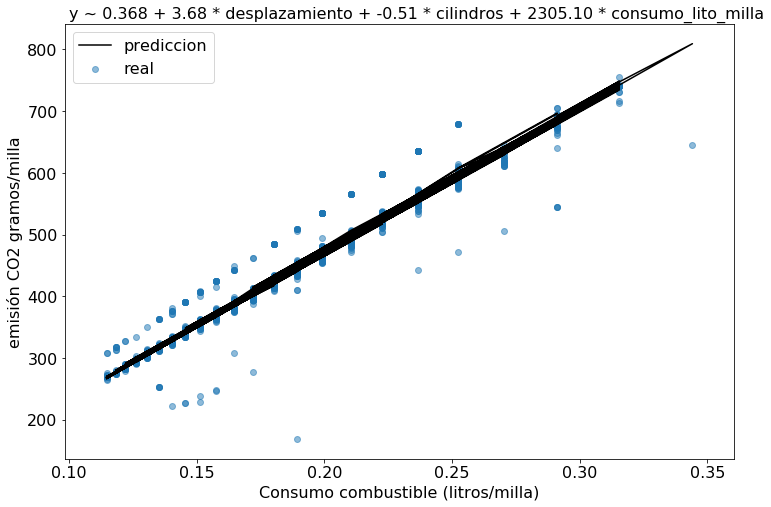

In [30]:
plt.scatter(vehiculos_test.consumo_litros_milla, vehiculos_test.co2, alpha=0.5, label="real")
plt.text(0.1, 850, model_formula)
plt.plot(vehiculos_test.consumo_litros_milla,vehiculos_test.co2_pred, c="black", label="prediccion")
plt.xlabel("Consumo combustible (litros/milla)")
plt.ylabel("emisión CO2 gramos/milla")
plt.legend();

In [31]:
def error_cuadratico_medio(y, y_pred):
    return np.sum((y - y_pred) ** 2) / len(y)

In [32]:
error_training = error_cuadratico_medio(vehiculos_training.co2, vehiculos_training.co2_pred)
error_training

128.62684911538162

In [33]:
error_test = error_cuadratico_medio(vehiculos_test.co2, vehiculos_test.co2_pred)
error_test

142.16518276689007

### Links

http://people.revoledu.com/kardi/tutorial/Regression/OLS.html

http://setosa.io/ev/ordinary-least-squares-regression/